In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
og_df = pd.read_csv('E:\\STUDY\\Final Year Project\\GWEAP\\Datasets\\Unfiltered\\weather datasets\\countries\\France.csv')
og_df = og_df.drop("Country", axis=1)
og_df.drop(og_df.filter(regex="Unname"), axis=1, inplace=True)
fullDf = og_df.copy()
og_df = og_df.head(10)
og_df

,dt,AverageTemperature
0,1743-11-01,10.203
1,1743-12-01,NaN
2,1744-01-01,NaN
3,1744-02-01,NaN
4,1744-03-01,NaN
5,1744-04-01,13.190
6,1744-05-01,14.133
7,1744-06-01,17.349
8,1744-07-01,18.782
9,1744-08-01,NaN


In [3]:
og_df.iloc[0]["AverageTemperature"]

10.203

In [4]:
# Generate Random NaNs in the dataframe
df = og_df.copy()
ix = [(row, 1) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(0.2*len(ix)))):
    df.iat[row, 1] = np.nan
df

,dt,AverageTemperature
0,1743-11-01,10.203
1,1743-12-01,NaN
2,1744-01-01,NaN
3,1744-02-01,NaN
4,1744-03-01,NaN
5,1744-04-01,13.190
6,1744-05-01,NaN
7,1744-06-01,17.349
8,1744-07-01,18.782
9,1744-08-01,NaN


In [5]:
# Filling method
newdf = df.interpolate()
if newdf["AverageTemperature"].isnull().values.any():
    newdf = newdf.fillna(method='bfill')
newdf

,dt,AverageTemperature
0,1743-11-01,10.2030
1,1743-12-01,10.8004
2,1744-01-01,11.3978
3,1744-02-01,11.9952
4,1744-03-01,12.5926
5,1744-04-01,13.1900
6,1744-05-01,15.2695
7,1744-06-01,17.3490
8,1744-07-01,18.7820
9,1744-08-01,18.7820


In [6]:
newset2 = df.fillna(method='ffill')
if newset2["AverageTemperature"].isnull().values.any():
    newset2 = newset2.fillna(method='bfill')
newset2

,dt,AverageTemperature
0,1743-11-01,10.203
1,1743-12-01,10.203
2,1744-01-01,10.203
3,1744-02-01,10.203
4,1744-03-01,10.203
5,1744-04-01,13.190
6,1744-05-01,13.190
7,1744-06-01,17.349
8,1744-07-01,18.782
9,1744-08-01,18.782


In [7]:
newset3 = df.fillna(method='bfill')
if newset3["AverageTemperature"].isnull().values.any():
    newset3 = newset3.fillna(method='ffill')
newset3

,dt,AverageTemperature
0,1743-11-01,10.203
1,1743-12-01,13.190
2,1744-01-01,13.190
3,1744-02-01,13.190
4,1744-03-01,13.190
5,1744-04-01,13.190
6,1744-05-01,17.349
7,1744-06-01,17.349
8,1744-07-01,18.782
9,1744-08-01,18.782


In [8]:
# Mean
meanFill = df.fillna(value=df["AverageTemperature"].mean())
meanFill

,dt,AverageTemperature
0,1743-11-01,10.203
1,1743-12-01,14.881
2,1744-01-01,14.881
3,1744-02-01,14.881
4,1744-03-01,14.881
5,1744-04-01,13.190
6,1744-05-01,14.881
7,1744-06-01,17.349
8,1744-07-01,18.782
9,1744-08-01,14.881


In [9]:
# Median
medianFill = df.fillna(value=df["AverageTemperature"].median())
medianFill

,dt,AverageTemperature
0,1743-11-01,10.2030
1,1743-12-01,15.2695
2,1744-01-01,15.2695
3,1744-02-01,15.2695
4,1744-03-01,15.2695
5,1744-04-01,13.1900
6,1744-05-01,15.2695
7,1744-06-01,17.3490
8,1744-07-01,18.7820
9,1744-08-01,15.2695


In [10]:
# Mode
modeFill = df.fillna(value=df["AverageTemperature"].mode()[0])
modeFill

,dt,AverageTemperature
0,1743-11-01,10.203
1,1743-12-01,10.203
2,1744-01-01,10.203
3,1744-02-01,10.203
4,1744-03-01,10.203
5,1744-04-01,13.190
6,1744-05-01,10.203
7,1744-06-01,17.349
8,1744-07-01,18.782
9,1744-08-01,10.203


In [11]:
# Euclidean Distance
def Euclidean_Dist(df1, df2, cols="AverageTemperature"):
    return np.linalg.norm(df1[cols].values - df2[cols].values)
data = {
    "Linear Interpolation": round(Euclidean_Dist(og_df, newdf), 3),
    "Forward Fill": round(Euclidean_Dist(og_df, newset2), 3),
    "Backward Fill": round(Euclidean_Dist(og_df, newset3), 3),
    "Mean": round(Euclidean_Dist(og_df, meanFill), 3),
    "Median": round(Euclidean_Dist(og_df, medianFill), 3),
    "Mode": round(Euclidean_Dist(og_df, modeFill), 3)
}

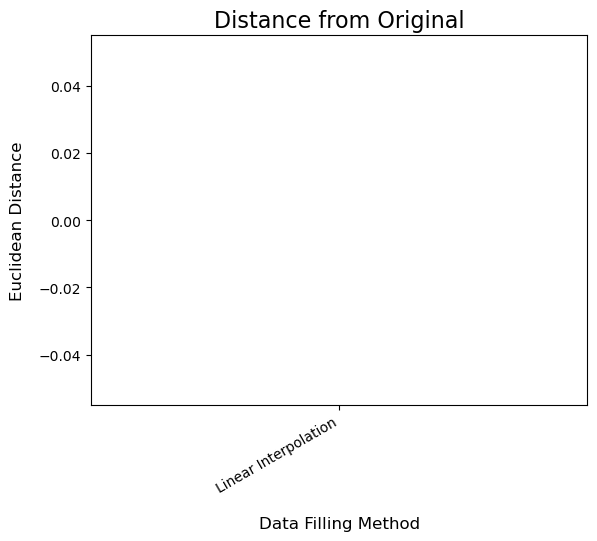

In [12]:
x = list(data.keys())
y = list(data.values())
plt.xlabel('Data Filling Method', labelpad=15, fontdict={'size': 12})
plt.ylabel('Euclidean Distance', labelpad=10, fontdict={'size': 12})
plt.title('Distance from Original', fontdict={'fontsize': 16})
ax = plt.subplot()
plt.bar(x, y)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [13]:
# Filling whole dataset using linear interpolation
fullDf = fullDf.interpolate()
if fullDf["AverageTemperature"].isnull().values.any():
    fullDf = fullDf.fillna(method='bfill')
fullDf

,dt,AverageTemperature
0,1743-11-01,10.2030
1,1743-12-01,10.8004
2,1744-01-01,11.3978
3,1744-02-01,11.9952
4,1744-03-01,12.5926
...,...,...
3234,2013-05-01,13.7630
3235,2013-06-01,17.7500
3236,2013-07-01,21.8170
3237,2013-08-01,20.3660


In [14]:
fullDf["AverageTemperature"] = fullDf["AverageTemperature"].round(decimals=3)
fullDf.head(10)

,dt,AverageTemperature
0,1743-11-01,10.203
1,1743-12-01,10.800
2,1744-01-01,11.398
3,1744-02-01,11.995
4,1744-03-01,12.593
5,1744-04-01,13.190
6,1744-05-01,14.133
7,1744-06-01,17.349
8,1744-07-01,18.782
9,1744-08-01,17.373


In [15]:
# converting string to datetime
fullDf["date"] = pd.to_datetime(fullDf["dt"])
fullDf.drop("dt", axis=1, inplace=True)
fullDf.to_csv('../../Processed Datasets/france.csv', sep=',', index=False)
fullDf.set_index("date", inplace=True)
fullDf = fullDf['1970':'2012']
fullDf.head()

,AverageTemperature
date,
1970-01-01,7.462
1970-02-01,7.615
1970-03-01,7.850
1970-04-01,10.547
1970-05-01,15.029


In [16]:
df1 = fullDf.copy()
df1.columns = ["avgTemp"]
df1.head()
# df1 = pd.DataFrame()
# years = []
# for i in range(len(fullDf)):
#     years.append(fullDf.iloc[i]["dt"].year)
# years = list(set(years))

,avgTemp
date,
1970-01-01,7.462
1970-02-01,7.615
1970-03-01,7.850
1970-04-01,10.547
1970-05-01,15.029


In [17]:
df1.describe()

,avgTemp
count,516.000000
mean,13.431068
std,4.742561
min,3.045000
25%,9.361750
50%,12.911500
75%,17.799500
max,23.662000


<AxesSubplot:xlabel='date'>

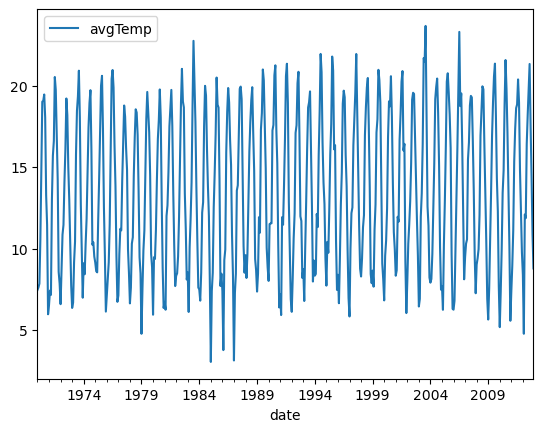

In [18]:
df1.plot()

# Testing for Stationarity:
### 1. Augmented Dickey-Fuller test:
#### Null Hypothesis: Series is not stationary.
#### Alternate Hypothesis: Series is stationary.

In [19]:
from statsmodels.tsa.stattools import adfuller


In [20]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df1["avgTemp"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.503504
p-value                          0.007898
No. of Lags Used                14.000000
Number of Observations Used    501.000000
Critical Value (1%)             -3.443470
Critical Value (5%)             -2.867326
Critical Value (10%)            -2.569852
dtype: float64


#### The p-value is lesser than the level of significance (0.05) and hence it is strong evidence against the null hypothesis and therefore we reject the null hypothesis. This indicates that our time series data is stationary.

### 2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
#### Null Hypothesis: Series is stationary.
#### Alternate Hypothesis: Series is not stationary.

In [21]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic','p-value','No. of Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(df1["avgTemp"])

Results of KPSS Test:
Test Statistic            0.556227
p-value                   0.029003
No. of Lags Used         19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [22]:
y = df1['avgTemp'].resample('MS').mean()
y.head()

date
1970-01-01     7.462
1970-02-01     7.615
1970-03-01     7.850
1970-04-01    10.547
1970-05-01    15.029
Freq: MS, Name: avgTemp, dtype: float64

#### The p-value is greater than the level of significance (0.05) and hence it is weak evidence against the null hypothesis and therefore we fail to reject the null hypothesis. This indicates that our time series is stationary.

# Both ADF and KPSS tests are in agreement that the time series data is stationary.


In [23]:
train = y[:'2009']
test = y['2010':]

In [24]:
# from pmdarima.arima import auto_arima

# #The default values of several important parameters for auto_arima function are as follows:
# #max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

# arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

In [25]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1, 0, 0), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model = model.fit(maxiter = 200, method = 'nm')
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 1.549632
         Iterations: 152
         Function evaluations: 262
                                      SARIMAX Results                                       
Dep. Variable:                              avgTemp   No. Observations:                  480
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -743.823
Date:                              Sat, 06 May 2023   AIC                           1495.647
Time:                                      13:33:02   BIC                           1512.232
Sample:                                  01-01-1970   HQIC                          1502.174
                                       - 12-01-2009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

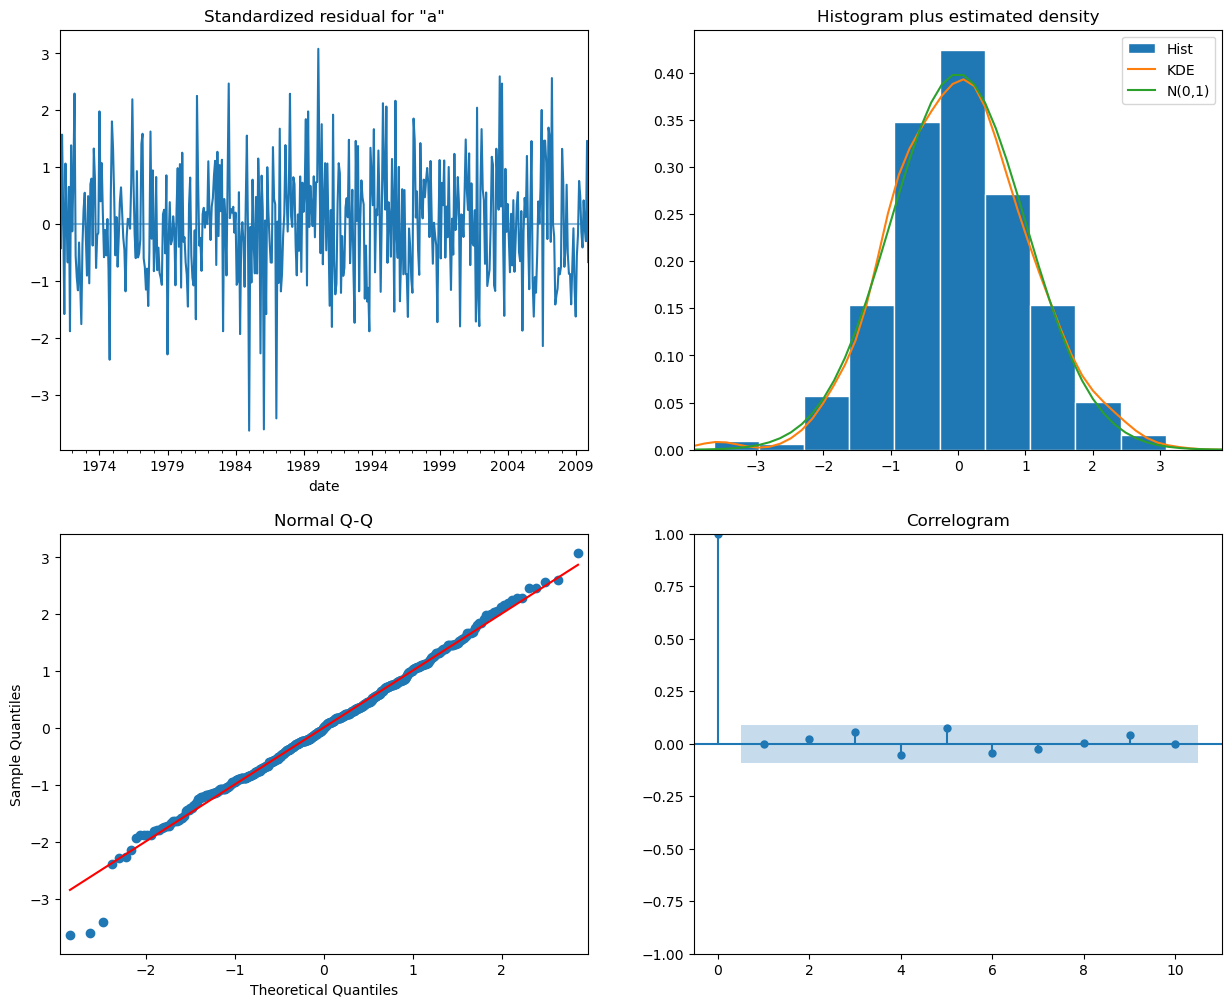

In [26]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

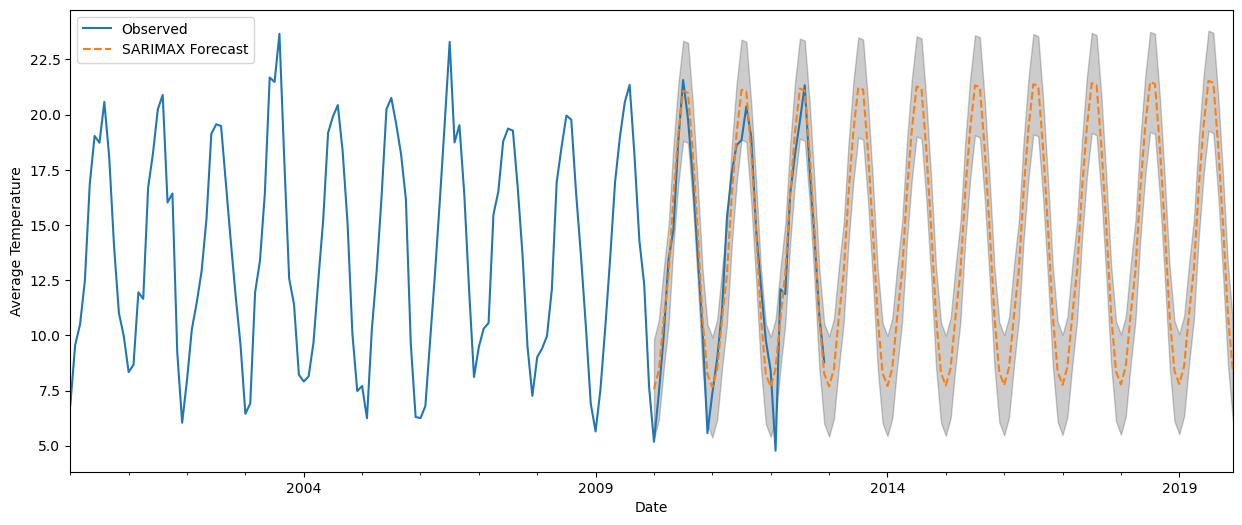

In [27]:
#Getting the SARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = fitted_model.get_forecast(steps = 120)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

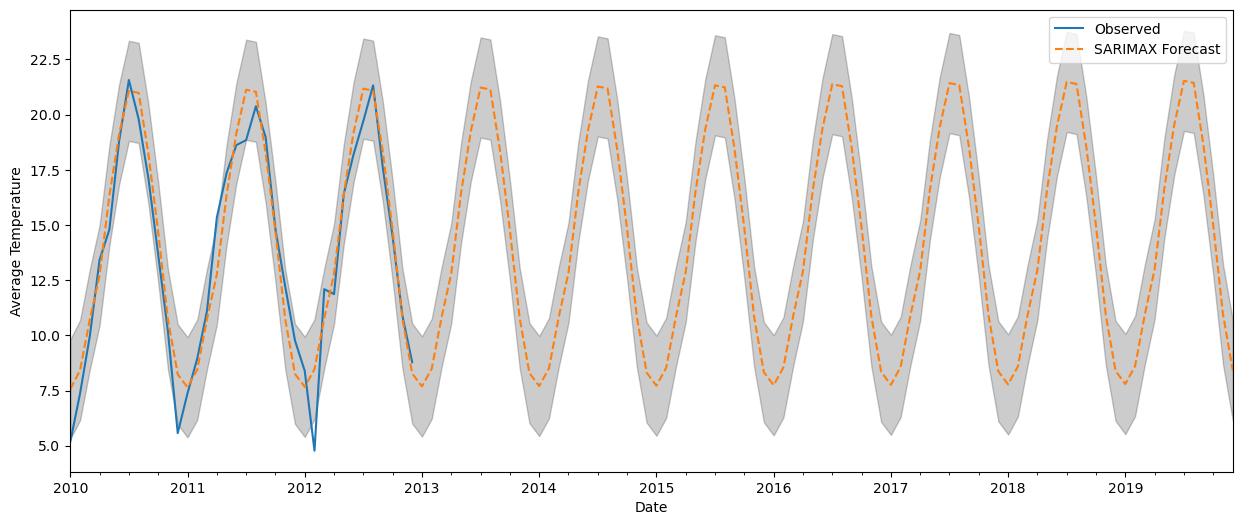

In [28]:
#Plotting the observed and forecasted values:
ax2 = y['2010':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax2, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

In [29]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 1.71
The Root Mean Squared Error of SARIMAX forecast is 1.31


# The RMSE tells us that the SARIMAX model was able to forecast the monthly average temperature within 0.62°C of the true temperature.